   Torque [Nm]  Tool wear [min]  Rotational speed [rpm]  \
0         42.8                0                    1551   
1         46.3                3                    1408   
2         49.4                5                    1498   
3         39.5                7                    1433   
4         40.0                9                    1408   

   Process temperature [K]  Type_L  Type_M  
0                    308.6   False    True  
1                    308.7    True   False  
2                    308.5    True   False  
3                    308.6    True   False  
4                    308.7    True   False  
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2415
           1       0.83      0.35      0.50        85

    accuracy                           0.98      2500
   macro avg       0.91      0.68      0.74      2500
weighted avg       0.97      0.98      0.97      2500



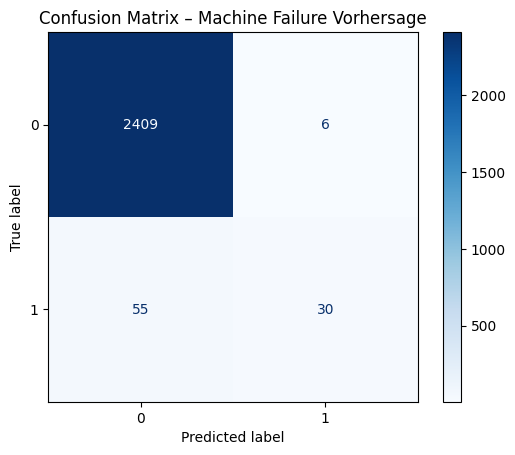

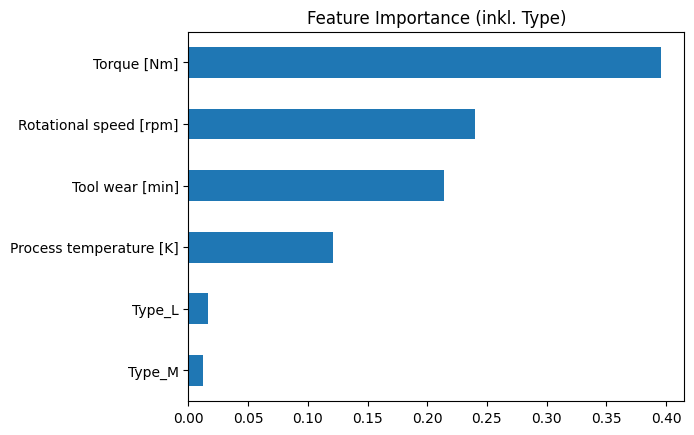

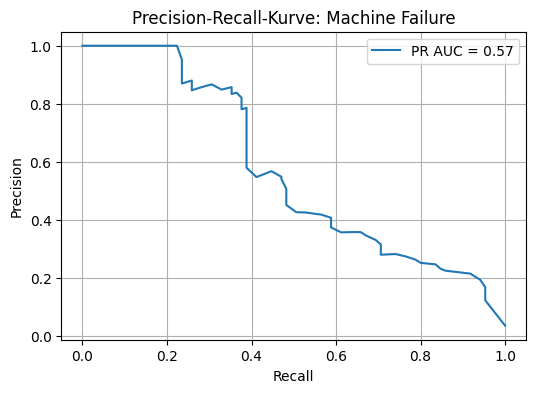

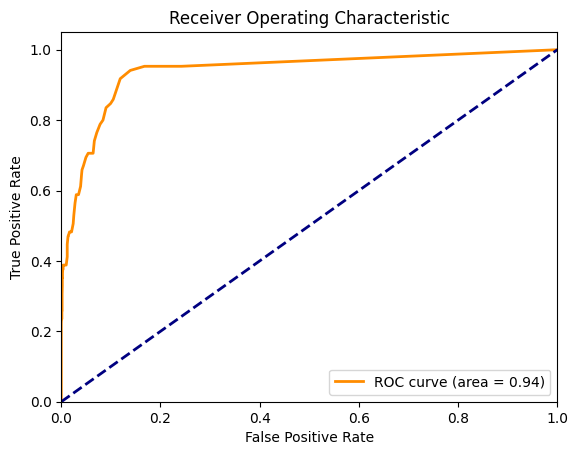

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, precision_recall_curve, auc, roc_curve, roc_auc_score

# Daten laden
df = pd.read_csv('../data/ai4i2020.csv')

# Ziel
y = df['Machine failure']

# Features inkl. Maschinentyp
feature_cols = ['Torque [Nm]', 'Tool wear [min]', 'Rotational speed [rpm]', 'Process temperature [K]', 'Type']
df_encoded = pd.get_dummies(df[feature_cols], drop_first=True)  # One-hot-Encoding für 'Type'

X = df_encoded

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# Modell
model_expanded = RandomForestClassifier(n_estimators=100, random_state=42)
model_expanded.fit(X_train, y_train)

# Vorhersage
y_pred = model_expanded.predict(X_test)
y_probs = model_expanded.predict_proba(X_test)[:, 1]  # Für Precision-Recall-Kurve
y_probs2 = model_expanded.predict_proba(X_test)[:, 1]  # Für ROC-Kurve

# Calculate the AUC - ROC score
roc_auc = roc_auc_score(y_test, y_probs2)

# Evaluation
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model_expanded, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix – Machine Failure Vorhersage")
plt.show()

# Feature Importance
importances = pd.Series(model_expanded.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh')
plt.title("Feature Importance (inkl. Type)")
plt.show()

# Precision-Recall-Kurve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall-Kurve: Machine Failure')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs2)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()